In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the Dataset
df = pd.read_csv('autos.csv', parse_dates=['dateCrawled', 'dateCreated', 'lastSeen'])
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20,0,40764,2016-03-24 12:45:21


# Cleaning the Dataset

### Removing unnecessary columns

In [3]:
df['nrOfPictures'].value_counts() # There is only 1 value

0    371528
Name: nrOfPictures, dtype: int64

In [4]:
df['seller'].value_counts() # There is only 1 value

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [5]:
df['offerType'].value_counts() # There is only 1 value

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

In [6]:
# dropping the columns
df.drop(columns= ['seller', 'offerType', 'nrOfPictures'], inplace = True)

### Time Series

In [7]:
#dateCrawled

In [8]:
df['dateCrawled-year'] = df['dateCrawled'].dt.year

In [9]:
df['dateCrawled-month'] = df['dateCrawled'].dt.month

In [10]:
df['dateCrawled-day'] = df['dateCrawled'].dt.day

In [11]:
# dateCreated

In [12]:
df['dateCreated-year'] = df['dateCreated'].dt.year

In [13]:
df['dateCreated-month'] = df['dateCreated'].dt.month

In [14]:
df['dateCreated-day'] = df['dateCreated'].dt.day

In [15]:
# lastSeen

In [16]:
df['lastSeen-year'] = df['lastSeen'].dt.year

In [17]:
df['lastSeen-month'] = df['lastSeen'].dt.month

In [18]:
df['lastSeen-day'] = df['lastSeen'].dt.day

In [19]:
# Droping the Columns
df.drop(columns= ['dateCrawled', 'dateCreated', 'lastSeen'], inplace = True)

In [20]:
# Rearranging the columns
df.insert(22, "price", df.pop("price"))

In [21]:
df

,name,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,...,dateCrawled-year,dateCrawled-month,dateCrawled-day,dateCreated-year,dateCreated-month,dateCreated-day,lastSeen-year,lastSeen-month,lastSeen-day,price
0,Golf_3_1.6,test,NaN,1993,manuell,0,golf,150000,0,benzin,...,2016,3,24,2016,3,24,2016,4,7,480
1,A5_Sportback_2.7_Tdi,test,coupe,2011,manuell,190,NaN,125000,5,diesel,...,2016,3,24,2016,3,24,2016,4,7,18300
2,"Jeep_Grand_Cherokee_""Overland""",test,suv,2004,automatik,163,grand,125000,8,diesel,...,2016,3,14,2016,3,14,2016,4,5,9800
3,GOLF_4_1_4__3TÜRER,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,...,2016,3,17,2016,3,17,2016,3,17,1500
4,Skoda_Fabia_1.4_TDI_PD_Classic,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,...,2016,3,31,2016,3,31,2016,4,6,3600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,Suche_t4___vito_ab_6_sitze,test,NaN,2005,NaN,0,NaN,20000,1,NaN,...,2016,3,14,2016,3,14,2016,4,6,2200
371524,Smart_smart_leistungssteigerung_100ps,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,...,2016,3,5,2016,3,5,2016,3,11,1199
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,test,bus,1996,manuell,102,transporter,150000,3,diesel,...,2016,3,19,2016,3,19,2016,4,7,9200
371526,VW_Golf_Kombi_1_9l_TDI,test,kombi,2002,manuell,100,golf,150000,6,diesel,...,2016,3,20,2016,3,20,2016,3,24,3400


### Missing Values

In [22]:
# Checking for Missing Values
df.isna().sum()

name                       0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
postalCode                 0
dateCrawled-year           0
dateCrawled-month          0
dateCrawled-day            0
dateCreated-year           0
dateCreated-month          0
dateCreated-day            0
lastSeen-year              0
lastSeen-month             0
lastSeen-day               0
price                      0
dtype: int64

In [23]:
# Replacing Missing Values
df['vehicleType'].fillna(df['vehicleType'].mode()[0], inplace = True)
df['gearbox'].fillna(df['gearbox'].mode()[0], inplace = True)
df['model'].fillna(df['model'].mode()[0], inplace = True)
df['fuelType'].fillna(df['fuelType'].mode()[0], inplace = True)
df['notRepairedDamage'].fillna(df['notRepairedDamage'].mode()[0], inplace = True)

In [24]:
df.isna().sum()

name                   0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
postalCode             0
dateCrawled-year       0
dateCrawled-month      0
dateCrawled-day        0
dateCreated-year       0
dateCreated-month      0
dateCreated-day        0
lastSeen-year          0
lastSeen-month         0
lastSeen-day           0
price                  0
dtype: int64

### Duplicate Values

In [25]:
# Checking for Duplicates
df.duplicated().sum()

1514

In [26]:
# Removing Duplicates
df = df.drop_duplicates()

In [27]:
df.duplicated().sum()

0

### Label Encoding

In [28]:
# Checking the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370014 entries, 0 to 371527
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   name                 370014 non-null  object
 1   abtest               370014 non-null  object
 2   vehicleType          370014 non-null  object
 3   yearOfRegistration   370014 non-null  int64 
 4   gearbox              370014 non-null  object
 5   powerPS              370014 non-null  int64 
 6   model                370014 non-null  object
 7   kilometer            370014 non-null  int64 
 8   monthOfRegistration  370014 non-null  int64 
 9   fuelType             370014 non-null  object
 10  brand                370014 non-null  object
 11  notRepairedDamage    370014 non-null  object
 12  postalCode           370014 non-null  int64 
 13  dateCrawled-year     370014 non-null  int64 
 14  dateCrawled-month    370014 non-null  int64 
 15  dateCrawled-day      370014 non-nu

In [29]:
# Converting all the columns using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['name'] = le.fit_transform(df['name'])
df['abtest'] = le.fit_transform(df['abtest'])
df['vehicleType'] = le.fit_transform(df['vehicleType'])
df['gearbox'] = le.fit_transform(df['gearbox'])
df['model'] = le.fit_transform(df['model'])
df['fuelType'] = le.fit_transform(df['fuelType'])
df['brand'] = le.fit_transform(df['brand'])
df['notRepairedDamage'] = df['notRepairedDamage'].replace({'nein' : 0, 'ja' : 1})

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370014 entries, 0 to 371527
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   name                 370014 non-null  int64
 1   abtest               370014 non-null  int64
 2   vehicleType          370014 non-null  int64
 3   yearOfRegistration   370014 non-null  int64
 4   gearbox              370014 non-null  int64
 5   powerPS              370014 non-null  int64
 6   model                370014 non-null  int64
 7   kilometer            370014 non-null  int64
 8   monthOfRegistration  370014 non-null  int64
 9   fuelType             370014 non-null  int64
 10  brand                370014 non-null  int64
 11  notRepairedDamage    370014 non-null  int64
 12  postalCode           370014 non-null  int64
 13  dateCrawled-year     370014 non-null  int64
 14  dateCrawled-month    370014 non-null  int64
 15  dateCrawled-day      370014 non-null  int64
 16  da

### Identifying and Handling Outliers

In [31]:
# Checking for outliers in 'price' column

<AxesSubplot:xlabel='price'>

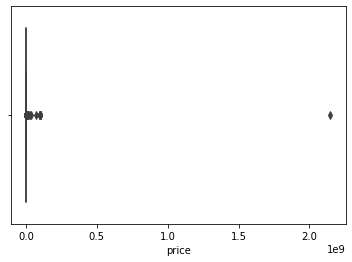

In [32]:
sns.boxplot(x = df['price'])

In [33]:
a = df['price'].quantile(q=[0.75,0.25])
a

0.75    7200.0
0.25    1150.0
Name: price, dtype: float64

In [34]:
IQR = a.iloc[0] - a.iloc[1]
IQR

6050.0

In [35]:
upper = a.iloc[0]+(1.5*IQR)
lower = a.iloc[1]-(1.5*IQR)

In [36]:
# upper limit
upper

16275.0

In [37]:
# lower limit
lower

-7925.0

In [38]:
df.shape

(370014, 23)

In [39]:
#rounding 16,000 to 20,000
df[df['price'] > 20000]

,name,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,...,dateCrawled-year,dateCrawled-month,dateCrawled-day,dateCreated-year,dateCreated-month,dateCreated-day,lastSeen-year,lastSeen-month,lastSeen-day,price
56,33444,1,3,2014,0,306,40,30000,7,1,...,2016,3,21,2016,3,21,2016,4,3,39600
80,108619,1,6,2010,0,204,97,80000,12,3,...,2016,3,11,2016,3,11,2016,4,3,20300
98,28159,0,6,2013,0,143,11,40000,6,3,...,2016,3,31,2016,3,31,2016,4,6,23490
104,87861,0,3,2012,0,303,40,50000,4,1,...,2016,3,16,2016,3,16,2016,4,6,22999
148,109744,0,7,2014,0,204,117,40000,9,3,...,2016,3,31,2016,3,30,2016,4,6,41900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371435,34884,0,6,2011,0,204,15,150000,2,3,...,2016,3,31,2016,3,31,2016,4,6,21499
371477,34996,0,5,2011,0,204,15,150000,7,3,...,2016,3,7,2016,3,7,2016,3,21,23900
371483,107865,0,6,2012,0,136,97,60000,4,3,...,2016,3,7,2016,3,7,2016,4,6,20500
371500,208790,1,6,2014,0,150,118,30000,9,1,...,2016,3,21,2016,3,21,2016,4,7,20400


In [40]:
# Dropping outliers in price
a = df[df['price'] > 20000].index
df.drop(a, inplace = True)

In [41]:
df.shape

(352927, 23)

<AxesSubplot:xlabel='price'>

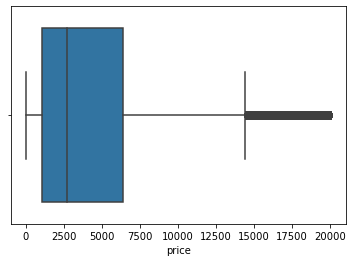

In [42]:
sns.boxplot(x = df['price'])

In [43]:
# Checking for outliers in 'yearOfRegistration' column

<AxesSubplot:xlabel='yearOfRegistration'>

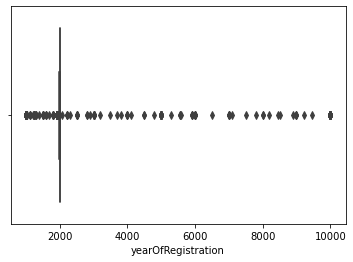

In [44]:
sns.boxplot(x = df['yearOfRegistration'])

In [45]:
a = df['yearOfRegistration'].quantile(q=[0.75,0.25])
a

0.75    2008.0
0.25    1999.0
Name: yearOfRegistration, dtype: float64

In [46]:
IQR = a.iloc[0] - a.iloc[1]
IQR

9.0

In [47]:
upper = a.iloc[0]+(1.5*IQR)
lower = a.iloc[1]-(1.5*IQR)

In [48]:
upper

2021.5

In [49]:
lower

1985.5

In [50]:
df[df['yearOfRegistration'] < 1985]

,name,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,...,dateCrawled-year,dateCrawled-month,dateCrawled-day,dateCreated-year,dateCreated-month,dateCreated-day,lastSeen-year,lastSeen-month,lastSeen-day,price
7,188353,1,6,1980,1,50,40,40000,7,1,...,2016,3,21,2016,3,21,2016,3,25,0
15,90949,1,4,1910,1,0,130,5000,0,1,...,2016,3,11,2016,3,11,2016,3,19,450
28,218714,1,1,1981,1,50,225,5000,1,1,...,2016,3,9,2016,3,9,2016,3,10,1990
39,113805,1,1,1984,1,70,40,150000,8,3,...,2016,3,25,2016,3,25,2016,3,27,1500
93,169804,0,6,1984,0,180,40,150000,3,1,...,2016,4,2,2016,4,2,2016,4,6,1222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371204,114686,0,6,1970,1,0,208,150000,0,1,...,2016,3,8,2016,3,8,2016,4,7,0
371312,104471,0,3,1981,0,136,40,150000,4,1,...,2016,3,15,2016,3,15,2016,3,26,8500
371441,39330,0,3,1973,1,200,40,150000,6,1,...,2016,3,21,2016,3,21,2016,4,6,16500
371457,49543,0,1,1984,0,0,40,70000,4,1,...,2016,3,12,2016,3,12,2016,3,24,5990


In [51]:
df[df['yearOfRegistration'] > 2019]

,name,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,...,dateCrawled-year,dateCrawled-month,dateCrawled-day,dateCreated-year,dateCreated-month,dateCreated-day,lastSeen-year,lastSeen-month,lastSeen-day,price
13576,202369,0,6,5000,1,0,118,5000,12,1,...,2016,3,29,2016,3,29,2016,4,6,49
15894,6953,0,6,9999,1,0,118,10000,0,1,...,2016,3,14,2016,3,13,2016,3,21,0
16657,231733,1,6,3200,1,0,118,5000,0,1,...,2016,4,2,2016,4,2,2016,4,6,1700
18121,134339,1,6,9999,1,0,40,10000,0,1,...,2016,3,23,2016,3,23,2016,4,5,700
18196,162017,0,6,8888,1,0,118,10000,0,1,...,2016,3,6,2016,3,6,2016,3,30,6500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351235,224121,1,6,4000,1,500,118,5000,0,1,...,2016,3,20,2016,3,20,2016,4,7,12000
352029,117063,0,6,7500,1,0,40,10000,0,1,...,2016,3,9,2016,3,9,2016,3,19,0
355280,81638,0,6,3000,1,3000,118,100000,6,1,...,2016,3,24,2016,3,24,2016,4,3,50
357075,181376,0,6,3500,1,75,118,5000,3,1,...,2016,4,2,2016,4,2,2016,4,4,0


In [52]:
# Dropping outliers in yearOfRegistration
a = df[df['yearOfRegistration'] > 2019].index
df.drop(a, inplace = True)
a = df[df['yearOfRegistration'] < 1985].index
df.drop(a, inplace = True)

<AxesSubplot:xlabel='yearOfRegistration'>

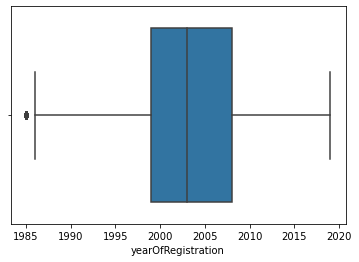

In [53]:
sns.boxplot(x = df['yearOfRegistration'])

In [54]:
df.shape

(347386, 23)

In [55]:
# Checking for outliers in 'powerPS' column 

<AxesSubplot:xlabel='powerPS'>

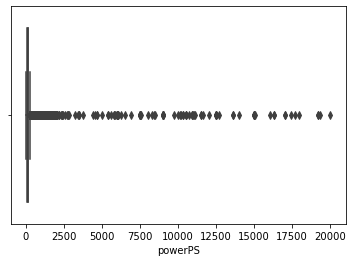

In [56]:
sns.boxplot(x = df['powerPS'])

In [57]:
a = df['powerPS'].quantile(q=[0.75,0.25])
a

0.75    143.0
0.25     69.0
Name: powerPS, dtype: float64

In [58]:
IQR = a.iloc[0] - a.iloc[1]
IQR

74.0

In [59]:
upper = a.iloc[0]+(1.5*IQR)
lower = a.iloc[1]-(1.5*IQR)

In [60]:
upper

254.0

In [61]:
lower

-42.0

In [62]:
df[df['powerPS'] > 250]

,name,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,...,dateCrawled-year,dateCrawled-month,dateCrawled-day,dateCreated-year,dateCreated-month,dateCreated-day,lastSeen-year,lastSeen-month,lastSeen-day,price
41,57019,0,6,2002,0,306,97,150000,4,1,...,2016,3,30,2016,3,30,2016,4,3,7500
60,180028,0,7,1994,1,286,118,150000,11,1,...,2016,3,29,2016,3,29,2016,4,6,1
117,209612,1,6,2002,1,265,118,150000,3,1,...,2016,3,20,2016,3,20,2016,4,7,6300
129,37127,0,6,1995,0,286,19,150000,12,1,...,2016,3,11,2016,3,11,2016,3,20,1800
177,73780,1,2,2006,1,305,159,50000,7,1,...,2016,3,7,2016,3,7,2016,3,12,19750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371414,37796,1,0,1994,1,1103,11,150000,0,1,...,2016,3,9,2016,3,9,2016,3,17,399
371436,41603,1,6,1993,0,286,15,150000,1,1,...,2016,3,7,2016,3,7,2016,4,5,6500
371461,18807,0,5,2008,0,269,31,150000,7,3,...,2016,4,2,2016,4,2,2016,4,6,16999
371494,37300,0,6,2004,0,445,19,125000,0,1,...,2016,3,26,2016,3,26,2016,4,6,11500


In [63]:
# Dropping outliers in powerPS
a = df[df['powerPS'] > 250].index
df.drop(a, inplace = True)

<AxesSubplot:xlabel='powerPS'>

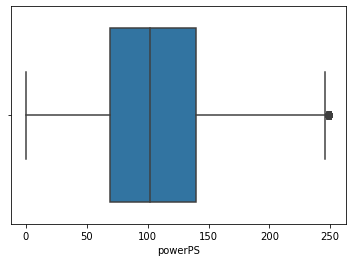

In [64]:
sns.boxplot(x = df['powerPS'])

In [65]:
df.shape

(340124, 23)

# Visualization

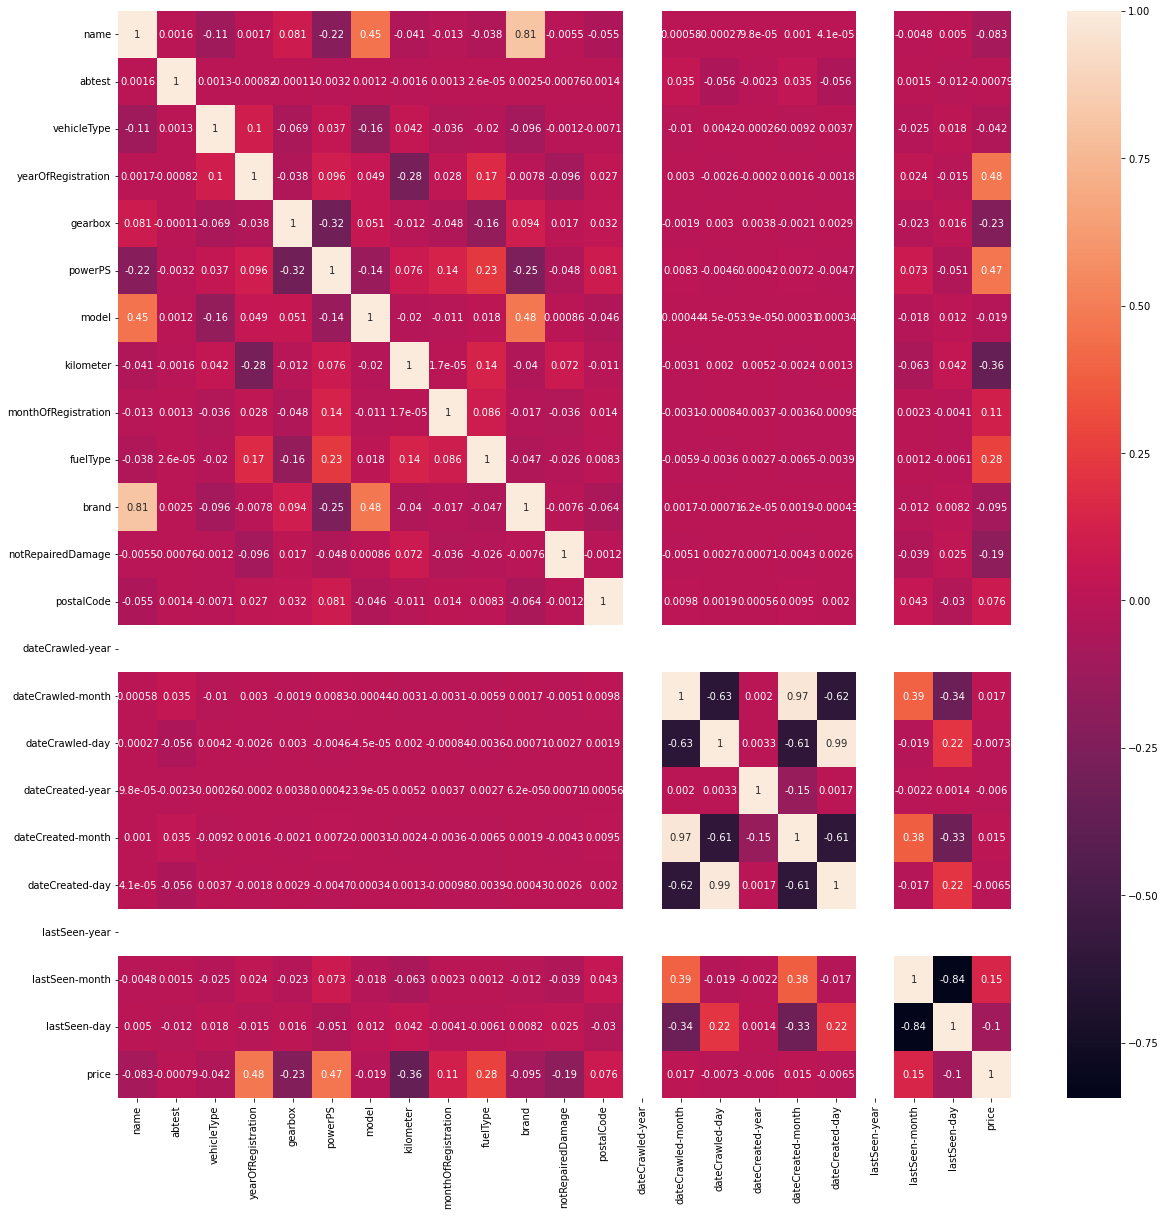

In [66]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [67]:
# sns.pairplot(df)
# plt.show()

# Splitting the Data

In [68]:
# Splitting x and y variables
x = df.drop(columns = 'price')
y = df['price']

In [69]:
# Splitting into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Building Models

In [70]:
# Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [72]:
# Lasso Regression

In [73]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)

Lasso()

In [74]:
# Ridge Regression

In [75]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)

Ridge()

In [76]:
# KNN

In [77]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [78]:
# Decision Tree

In [79]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [80]:
# Random Forest

In [81]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train, y_train)

RandomForestRegressor()

In [82]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [83]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)

AdaBoostRegressor()

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
grad = GradientBoostingRegressor()
grad.fit(x_train, y_train)

GradientBoostingRegressor()

In [85]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
cat.fit(x_train, y_train)

Learning rate set to 0.099281
0:	learn: 4094.4992258	total: 81.6ms	remaining: 1m 21s
1:	learn: 3848.7617710	total: 96ms	remaining: 47.9s
2:	learn: 3636.0475434	total: 109ms	remaining: 36.3s
3:	learn: 3443.8321703	total: 123ms	remaining: 30.6s
4:	learn: 3269.3221581	total: 136ms	remaining: 27.1s
5:	learn: 3121.9004766	total: 149ms	remaining: 24.8s
6:	learn: 2997.2018288	total: 163ms	remaining: 23.1s
7:	learn: 2881.8668189	total: 177ms	remaining: 21.9s
8:	learn: 2783.5202546	total: 191ms	remaining: 21.1s
9:	learn: 2695.1860989	total: 203ms	remaining: 20.1s
10:	learn: 2621.4706771	total: 217ms	remaining: 19.5s
11:	learn: 2555.6822835	total: 231ms	remaining: 19s
12:	learn: 2500.9979355	total: 244ms	remaining: 18.5s
13:	learn: 2448.7956617	total: 257ms	remaining: 18.1s
14:	learn: 2403.5300404	total: 269ms	remaining: 17.7s
15:	learn: 2362.8824818	total: 282ms	remaining: 17.3s
16:	learn: 2325.1956742	total: 294ms	remaining: 17s
17:	learn: 2292.9980874	total: 307ms	remaining: 16.8s
18:	learn: 

164:	learn: 1729.3466704	total: 2.2s	remaining: 11.1s
165:	learn: 1728.6086325	total: 2.21s	remaining: 11.1s
166:	learn: 1727.8710528	total: 2.22s	remaining: 11.1s
167:	learn: 1726.9432737	total: 2.24s	remaining: 11.1s
168:	learn: 1726.2783004	total: 2.25s	remaining: 11.1s
169:	learn: 1725.6518621	total: 2.26s	remaining: 11.1s
170:	learn: 1725.0727388	total: 2.28s	remaining: 11s
171:	learn: 1724.5440952	total: 2.29s	remaining: 11s
172:	learn: 1724.1288554	total: 2.3s	remaining: 11s
173:	learn: 1723.7304466	total: 2.31s	remaining: 11s
174:	learn: 1723.0540805	total: 2.32s	remaining: 11s
175:	learn: 1722.5554627	total: 2.34s	remaining: 10.9s
176:	learn: 1721.7743396	total: 2.35s	remaining: 10.9s
177:	learn: 1720.7270144	total: 2.36s	remaining: 10.9s
178:	learn: 1719.8745129	total: 2.37s	remaining: 10.9s
179:	learn: 1719.4653225	total: 2.38s	remaining: 10.9s
180:	learn: 1718.7995246	total: 2.4s	remaining: 10.9s
181:	learn: 1718.0091190	total: 2.41s	remaining: 10.8s
182:	learn: 1717.222275

324:	learn: 1649.8357501	total: 4.21s	remaining: 8.75s
325:	learn: 1649.4894874	total: 4.23s	remaining: 8.74s
326:	learn: 1649.1931474	total: 4.24s	remaining: 8.73s
327:	learn: 1648.8035454	total: 4.26s	remaining: 8.72s
328:	learn: 1648.5270294	total: 4.27s	remaining: 8.71s
329:	learn: 1648.0402851	total: 4.29s	remaining: 8.7s
330:	learn: 1647.8401116	total: 4.3s	remaining: 8.69s
331:	learn: 1647.6633725	total: 4.31s	remaining: 8.68s
332:	learn: 1647.4766728	total: 4.32s	remaining: 8.66s
333:	learn: 1647.1047592	total: 4.34s	remaining: 8.65s
334:	learn: 1646.8883474	total: 4.35s	remaining: 8.63s
335:	learn: 1646.4368639	total: 4.36s	remaining: 8.62s
336:	learn: 1646.2146550	total: 4.37s	remaining: 8.61s
337:	learn: 1645.6538750	total: 4.39s	remaining: 8.59s
338:	learn: 1645.4128775	total: 4.4s	remaining: 8.58s
339:	learn: 1645.1031531	total: 4.41s	remaining: 8.57s
340:	learn: 1644.8521238	total: 4.42s	remaining: 8.55s
341:	learn: 1644.3990805	total: 4.44s	remaining: 8.54s
342:	learn: 1

485:	learn: 1606.5074257	total: 6.24s	remaining: 6.6s
486:	learn: 1606.3743433	total: 6.25s	remaining: 6.59s
487:	learn: 1606.0932120	total: 6.27s	remaining: 6.58s
488:	learn: 1605.8160592	total: 6.28s	remaining: 6.56s
489:	learn: 1605.6127520	total: 6.29s	remaining: 6.55s
490:	learn: 1605.5142301	total: 6.3s	remaining: 6.54s
491:	learn: 1605.3466725	total: 6.32s	remaining: 6.52s
492:	learn: 1605.1038621	total: 6.33s	remaining: 6.51s
493:	learn: 1604.6773451	total: 6.34s	remaining: 6.5s
494:	learn: 1604.4070552	total: 6.36s	remaining: 6.49s
495:	learn: 1604.2467999	total: 6.37s	remaining: 6.47s
496:	learn: 1604.1286138	total: 6.38s	remaining: 6.46s
497:	learn: 1604.0094174	total: 6.4s	remaining: 6.45s
498:	learn: 1603.8169130	total: 6.41s	remaining: 6.43s
499:	learn: 1603.6454249	total: 6.42s	remaining: 6.42s
500:	learn: 1603.4420603	total: 6.44s	remaining: 6.41s
501:	learn: 1603.2243299	total: 6.45s	remaining: 6.4s
502:	learn: 1602.9320347	total: 6.46s	remaining: 6.39s
503:	learn: 160

650:	learn: 1576.4563711	total: 8.3s	remaining: 4.45s
651:	learn: 1576.2937319	total: 8.31s	remaining: 4.44s
652:	learn: 1576.1610444	total: 8.32s	remaining: 4.42s
653:	learn: 1576.0362657	total: 8.34s	remaining: 4.41s
654:	learn: 1575.8723443	total: 8.35s	remaining: 4.4s
655:	learn: 1575.7262994	total: 8.36s	remaining: 4.38s
656:	learn: 1575.4828374	total: 8.37s	remaining: 4.37s
657:	learn: 1575.3242202	total: 8.39s	remaining: 4.36s
658:	learn: 1575.2437684	total: 8.4s	remaining: 4.34s
659:	learn: 1575.1368730	total: 8.41s	remaining: 4.33s
660:	learn: 1575.0653437	total: 8.42s	remaining: 4.32s
661:	learn: 1574.8831961	total: 8.43s	remaining: 4.31s
662:	learn: 1574.6220061	total: 8.45s	remaining: 4.29s
663:	learn: 1574.4498157	total: 8.46s	remaining: 4.28s
664:	learn: 1574.2766045	total: 8.47s	remaining: 4.27s
665:	learn: 1574.1991702	total: 8.48s	remaining: 4.25s
666:	learn: 1574.0960802	total: 8.49s	remaining: 4.24s
667:	learn: 1573.9116523	total: 8.51s	remaining: 4.23s
668:	learn: 1

801:	learn: 1554.1212355	total: 10.2s	remaining: 2.51s
802:	learn: 1553.9790035	total: 10.2s	remaining: 2.49s
803:	learn: 1553.8081172	total: 10.2s	remaining: 2.48s
804:	learn: 1553.7060703	total: 10.2s	remaining: 2.47s
805:	learn: 1553.5708533	total: 10.2s	remaining: 2.46s
806:	learn: 1553.4609546	total: 10.2s	remaining: 2.44s
807:	learn: 1553.3423185	total: 10.2s	remaining: 2.43s
808:	learn: 1553.1829173	total: 10.2s	remaining: 2.42s
809:	learn: 1553.1049882	total: 10.3s	remaining: 2.4s
810:	learn: 1552.8888276	total: 10.3s	remaining: 2.39s
811:	learn: 1552.8139860	total: 10.3s	remaining: 2.38s
812:	learn: 1552.6364706	total: 10.3s	remaining: 2.37s
813:	learn: 1552.4372075	total: 10.3s	remaining: 2.35s
814:	learn: 1552.3079552	total: 10.3s	remaining: 2.34s
815:	learn: 1552.1546811	total: 10.3s	remaining: 2.33s
816:	learn: 1551.9899231	total: 10.3s	remaining: 2.32s
817:	learn: 1551.8014180	total: 10.4s	remaining: 2.3s
818:	learn: 1551.6330600	total: 10.4s	remaining: 2.29s
819:	learn: 

964:	learn: 1531.8964927	total: 12.2s	remaining: 442ms
965:	learn: 1531.7597903	total: 12.2s	remaining: 429ms
966:	learn: 1531.6094249	total: 12.2s	remaining: 417ms
967:	learn: 1531.4860626	total: 12.2s	remaining: 404ms
968:	learn: 1531.3996535	total: 12.2s	remaining: 392ms
969:	learn: 1531.1947055	total: 12.3s	remaining: 379ms
970:	learn: 1530.9853312	total: 12.3s	remaining: 366ms
971:	learn: 1530.8824897	total: 12.3s	remaining: 354ms
972:	learn: 1530.7688102	total: 12.3s	remaining: 341ms
973:	learn: 1530.6933337	total: 12.3s	remaining: 328ms
974:	learn: 1530.6155945	total: 12.3s	remaining: 316ms
975:	learn: 1530.5284036	total: 12.3s	remaining: 303ms
976:	learn: 1530.4694402	total: 12.3s	remaining: 290ms
977:	learn: 1530.3486415	total: 12.3s	remaining: 278ms
978:	learn: 1530.1843636	total: 12.4s	remaining: 265ms
979:	learn: 1529.9947630	total: 12.4s	remaining: 253ms
980:	learn: 1529.8872715	total: 12.4s	remaining: 240ms
981:	learn: 1529.7668163	total: 12.4s	remaining: 227ms
982:	learn

# Checking the Metrics of the models

In [86]:
# Linear Regression
acc_lr = lr.score(x_test, y_test)*100

In [87]:
# Lasso Regression
acc_lasso = lasso.score(x_test, y_test)*100

In [88]:
# Ridge Regression
acc_ridge = ridge.score(x_test, y_test)*100

In [89]:
# K Nearest Neighbour
acc_knn = knn.score(x_test, y_test)*100

In [90]:
# Decision Tree
acc_dt = DT.score(x_test, y_test)*100

In [91]:
# Random Forest
acc_rf = RF.score(x_test, y_test)*100

In [92]:
# XG Boost
acc_xg = xg.score(x_test, y_test)*100

In [93]:
# ADA Boost
acc_ada = ada.score(x_test, y_test)*100

In [94]:
# Gradient Boost
acc_grad = grad.score(x_test, y_test)*100

In [95]:
# CAT Boost
acc_cat = cat.score(x_test, y_test)*100

In [96]:
models = pd.DataFrame(
    {'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression',
               'KNN', 'Decision Tree', 'Random Forest', 'XG Boost', 
               'ADA Boost', 'Gradient Boost', 'Cat Boost'],
     
     'Score': [acc_lr, acc_lasso, acc_ridge, acc_knn, acc_dt, 
               acc_rf, acc_xg, acc_ada, acc_grad, acc_cat]})

In [97]:
models.sort_values(by='Score', ascending=False, ignore_index=True)

,Model,Score
0,Cat Boost,86.845740
1,Random Forest,86.839145
2,XG Boost,86.589141
3,Gradient Boost,80.974922
4,Decision Tree,73.798079
5,Ridge Regression,54.769377
6,Linear Regression,54.768810
7,Lasso Regression,54.768417
8,ADA Boost,53.126961
9,KNN,36.435711


# Saving the Model

In [100]:
import pickle
pickle.dump(cat, open('Car Resale Value Prediction.pkl', 'wb'))